In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
floc = "../../input_data/historical/"
gcol = 'real_nits_kw'

In [5]:
df = pd.read_csv(floc+"nexxa_combined_features.csv") #input data
df2 = pd.read_csv(floc+"nexxa_combined_targets.csv") #target data, in this case each account's actual rce


/home/brandon/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df2 = df2[['uuid',gcol]].dropna(how='any')
print(df2.shape)
df2.head()

(157626, 2)


uuid  real_nits_kw
0  1b3752ec-3a42-4308-bb56-10402d892393         11.92
1  7f87867a-6e14-4922-94d1-b20795832ed4          3.62
2  d96228d6-b650-4ecb-abea-97103c3ca7b1          0.71
3  acbc70e7-8b7d-46b7-aede-af0fd7a66e0a          2.49
4  2b1cdb59-a243-4a13-b42c-c472c260a8e8          0.68

In [8]:
df = df.merge(df2,on='uuid')
df = df[df[gcol] <= 15]
df = df[df.isnull().sum(axis=1) <= 15]
print(df.shape)
df.head()

(130067, 28)


uuid  OccupationRollup  EducationLevel  \
0  86f54722-f331-4140-9c42-2a03b89dd6da                17               3   
1  f6913def-a6b6-4ab0-a74b-1d2ea64369b0                17               5   
2  4fe627d9-31f8-4c8f-be22-3878e910e2b1                17               3   
3  53c1335e-364f-4a56-8923-5aac43603192                17               3   
4  5c3b349d-9c33-4675-ac40-01b08db778b7                17               3   

   longitude  YEAR_BUILT  ESTINCOME  population  state  median_income  \
0   -87.6568        2013          7       66461      2     78622.5332   
1   -87.6568         -99        -99       66461      2     78622.5332   
2   -87.6568        2000          9       66461      2     78622.5332   
3   -87.6568        1899          5       66461      2     78622.5332   
4   -87.6568        1889          9       66461      2     78622.5332   

   Mail Public Responder Indicator  ...  SALE_PRICE  HHSIZE  \
0                                2  ...      950000       3   
1                                2  ...         -99     -99   
2                                2  ...         -99       6   
3                                2  ...     1075000       5   
4                                2  ...      160000       2   

   LAND_SQUARE_FOOTAGE_D  DwellingType  Gender  FuelDescription  \
0                   3125             1       1                9   
1                    -99             0       2                9   
2                   3584             1       1                9   
3                   6240             1       1                9   
4                   3125             1       1                9   

   ASSD_TOTAL_VALUE  median_home_value  TotalRooms  real_nits_kw  
0            147500             344500           0        8.5203  
1               -99             344500         -99        4.2608  
2            114342             344500           0        3.5458  
3            129672             344500           0       10.2089  
4             65328             344500           0        2.4749  

[5 rows x 28 columns]

In [9]:
df.columns

Index(['uuid', 'OccupationRollup', 'EducationLevel', 'longitude', 'YEAR_BUILT',
       'ESTINCOME', 'population', 'state', 'median_income',
       'Mail Public Responder Indicator', 'Home Value Range',
       'AGEOFINDIVIDUAL', 'Marital Status', 'Home Ownership',
       'UNIVERSAL_BUILDING_SQUARE_FEET', 'latitude',
       'NetworthIndicator_Rollup', 'ASSD_LAND_VALUE', 'SALE_PRICE', 'HHSIZE',
       'LAND_SQUARE_FOOTAGE_D', 'DwellingType', 'Gender', 'FuelDescription',
       'ASSD_TOTAL_VALUE', 'median_home_value', 'TotalRooms', 'real_nits_kw'],
      dtype='object')

<AxesSubplot:xlabel='real_nits_kw'>

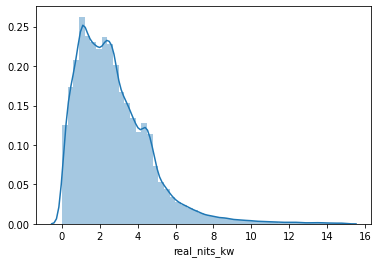

In [12]:
sns.distplot(df[df[gcol] < 15][gcol])

In [13]:
du = df[gcol].mean()
ds = df[gcol].std()
din = {'mean': du, 'std': ds}
np.save('scale_nits.npy',din)
#return distance from mean in units of std
din

{'mean': 2.730535590045906, 'std': 1.9863695856374208}

In [14]:
df[gcol] = df[gcol].apply(lambda x: (x - din['mean']) / din['std'])
df.head()

uuid  OccupationRollup  EducationLevel  \
0  86f54722-f331-4140-9c42-2a03b89dd6da                17               3   
1  f6913def-a6b6-4ab0-a74b-1d2ea64369b0                17               5   
2  4fe627d9-31f8-4c8f-be22-3878e910e2b1                17               3   
3  53c1335e-364f-4a56-8923-5aac43603192                17               3   
4  5c3b349d-9c33-4675-ac40-01b08db778b7                17               3   

   longitude  YEAR_BUILT  ESTINCOME  population  state  median_income  \
0   -87.6568        2013          7       66461      2     78622.5332   
1   -87.6568         -99        -99       66461      2     78622.5332   
2   -87.6568        2000          9       66461      2     78622.5332   
3   -87.6568        1899          5       66461      2     78622.5332   
4   -87.6568        1889          9       66461      2     78622.5332   

   Mail Public Responder Indicator  ...  SALE_PRICE  HHSIZE  \
0                                2  ...      950000       3   
1                                2  ...         -99     -99   
2                                2  ...         -99       6   
3                                2  ...     1075000       5   
4                                2  ...      160000       2   

   LAND_SQUARE_FOOTAGE_D  DwellingType  Gender  FuelDescription  \
0                   3125             1       1                9   
1                    -99             0       2                9   
2                   3584             1       1                9   
3                   6240             1       1                9   
4                   3125             1       1                9   

   ASSD_TOTAL_VALUE  median_home_value  TotalRooms  real_nits_kw  
0            147500             344500           0      2.914747  
1               -99             344500         -99      0.770383  
2            114342             344500           0      0.410429  
3            129672             344500           0      3.764840  
4             65328             344500           0     -0.128695  

[5 rows x 28 columns]

In [16]:
df[['uuid']].to_csv("./output_data/X_mapping.csv",index=False)
X = df.drop(['uuid',gcol],1)
X.to_csv("./output_data/X.csv",index=False)
y = df[[gcol]]
y.to_csv("./output_data/y.csv",index=False)

In [17]:
train, test = train_test_split(df.drop(['uuid'],1), test_size=0.2,random_state=1)
print(train.shape,test.shape)
train.drop(gcol,1).to_csv("./output_data/train_X.csv",index=False)
train[[gcol]].to_csv("./output_data/train_y.csv",index=False)

test.drop(gcol,1).to_csv("./output_data/test_X.csv",index=False)
test[[gcol]].to_csv("./output_data/test_y.csv",index=False)

(104053, 27) (26014, 27)
